# Einfache Lineare Regression (ERL)
Dieses Skript liest einen einzelnen Sensorwert (Distanz, Analog ...) über ein Raspberry Pi aus und speichert diesen ab. Die so gesammelten Werte werden einer **Einfachen Regressionsanalyse (ERL)** unterzogen.

Bei einer ERL wird davon ausgegangen, dass einem Datensatz (Punktewolke der Sensorwerte) ein lineares Modell $Y$ mit zufälligem Fehler $\varepsilon$ zugrundegelegt werden kann. Das Modell wird mathematisch wie folgt dargestellt:
$$
Y = \beta_0 + \beta_1 \cdot x + \varepsilon
$$
Um den Begriff "Linear" entsteht oft eine gewisse Verwirrung: "linear" kommt nicht von der linearen Funktion, welche bei der ERL gesucht wird, sondern von der [linearen Unabhängigkeit](https://de.wikipedia.org/wiki/Lineare_Unabh%C3%A4ngigkeit) der Regressionsgewichte $\beta_1 , \beta_2 , ...$


Kurz gesagt, werden mit der ERL die Koeffizienten $b_0$ und $b_1$ der Funktion $f(x)$ geschätzt, welche das Lineare Modell $Y$ wie folgt annähert:
$$
    f(x) = b_0 + b_1 \cdot x
$$

Damit kann eine beschreibbare Kurve in die Daten hinein "gefittet" werden.
Die Koeffizienten $b_0$ und $b_1$ müssen daher ermittelt werden, um die Sensorwerte in Zukunft sinnvoll verrechnen zu können.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="200"/>

Die Abweichung der tatsächlichen Datenpunkte $y_i$ zum jeweiligen Schätzwert $f(x_i)$ wird Residuum genannt. Das Ziel jeder Regressionsmethode - die ERL ist nur eine unter vielen - ist es, die Residuen zu minimieren.
Normalerweise wird dies über die Minimierung der Quadratsfunktion $\sum\limits_i \left( y_i - f(x_i) \right)^2$ gemacht, von wo der landläufige Begriff "least square" herrührt.

## Sensorwert lesen
In diesem Abschnitt wird über die Netzwerkverbindung ein Skript auf dem Raspberry Pi ausgeführt, welches den gewünschten Sensorwert zurückgibt.
Mit `simulation = True` kann dies simuliert werden, falls kein Raspberry Pi zur Verfügung steht.

In [1]:
simulation = True # otherwise 'False'
_noise_gain = 0.5
#
import random # used for simulation only
#
try:
    x=float(input())
    x=round(x, 3)
    #
    if(simulation == False):
        _sens_val = !sshpass -p "muffin" ssh -tq -o StrictHostKeyChecking=false -o UserKnownHostsFile=/dev/null  stud@10.180.254.107 'python getVal.py'
        _sens_val = _sens_val[0]
    else:
        #_sens_val = ['10'] # SSH FORMAT
        _sens_val = x + _noise_gain*random.uniform(-1.0, 1.0)
        _sens_val = round(_sens_val, 3)
    #
    print("Eingestellter Wert: " + str(x))
    print("Vom Sensor:         " + str(_sens_val))
#
except ValueError:
    print("Bitte numerischen Wert eingeben.")
    exit(0)

9
Eingestellter Wert: 9.0
Vom Sensor:         9.01


## Werte Abspeichern

In [2]:
_file="measurement.csv"
_entry = [x , _sens_val]
#
import csv
#
with open(r"%s" % _file , "a" ) as _f: 
    writer = csv.writer(_f)
    writer.writerow(_entry)

## Daten einlesen

In [3]:
import numpy
from numpy import genfromtxt

try:
    _data = genfromtxt(_file, delimiter=',')
    _d_len = numpy.size(_data,0)

except IOError:
    print("File not found.")

print(_data)

[[1.    0.832]
 [2.    1.526]
 [3.    2.69 ]
 [4.    4.157]
 [5.    4.571]
 [6.    5.561]
 [7.    7.116]
 [8.    7.689]
 [9.    9.01 ]]


## Koeffizienten bestimmen

In [4]:
from scipy import stats
import numpy
if(_d_len > 2):
    _b1, _b0, r_value, p_value, std_err = stats.linregress(_data[:,0], _data[:,1])
    
    est = lambda t: _b0 + _b1*t
    erl = numpy.vectorize(est)
    _f = erl(_data[:,0])

## Darstellung der Daten

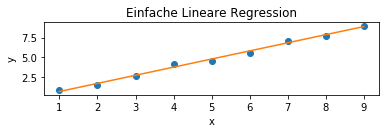

In [6]:
import matplotlib.pyplot as plt
import numpy
#
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
if(_d_len > 2): 
    ax1 = plt.subplot(2, 1, 1)
    plt.plot(_data[:,0], _data[:,1], 'o')
    plt.plot(_data[:,0], _f, '-')
    plt.title('Einfache Lineare Regression')
    plt.xlabel('x', axes=ax1)
    plt.ylabel('y', axes=ax1)
    #
    #ax2 = plt.subplot(2, 1, 2)
    #plt.plot(_data[:,0], _data[:,1], '.-')
    #plt.xlabel('n', axes=ax2)
    #plt.ylabel('r', axes=ax2)

    plt.show()
